In [1]:
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
import numpy as np

import json

with open('new_data.json', 'r') as inp:
    data = json.load(inp)

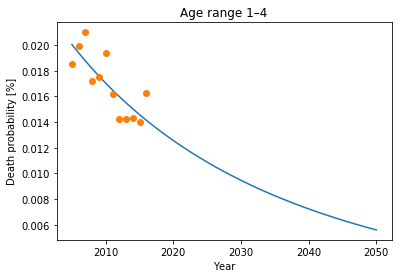

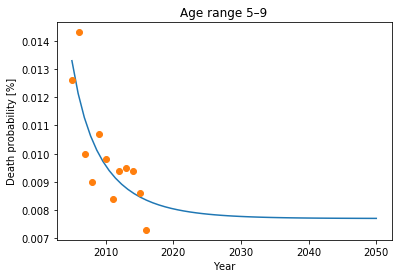

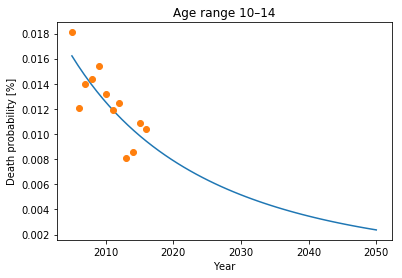

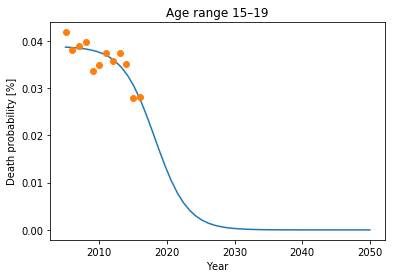

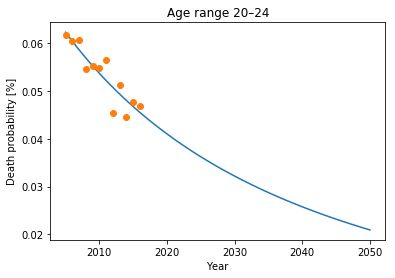

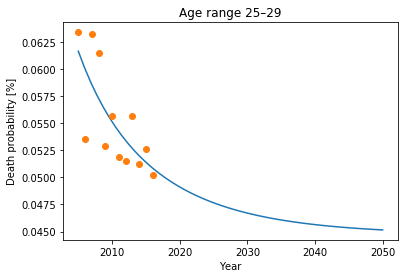

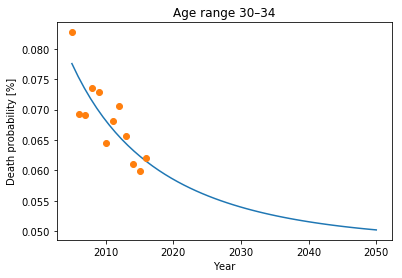

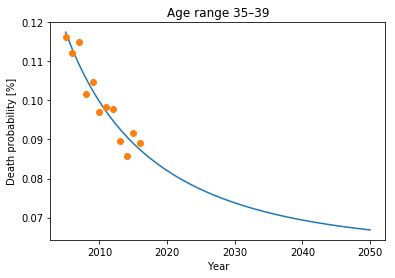

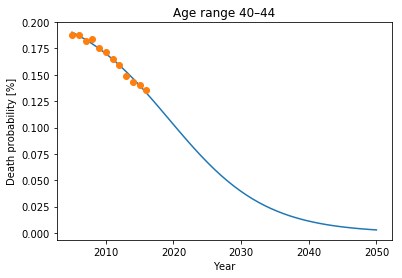

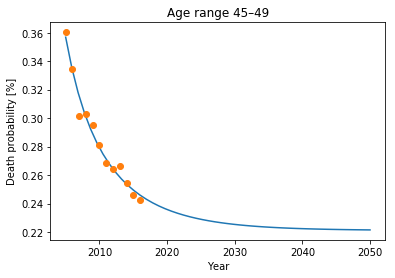

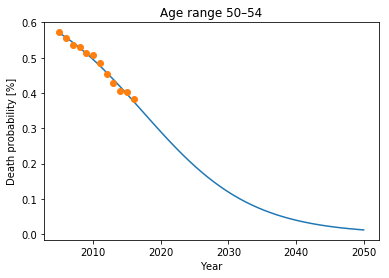

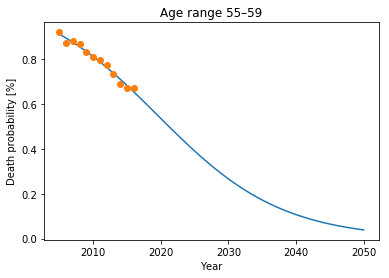

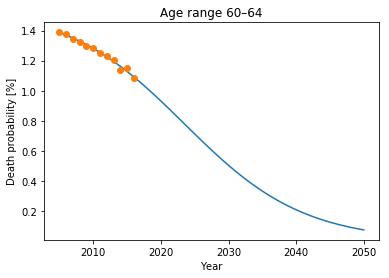

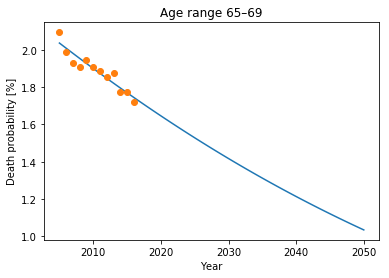

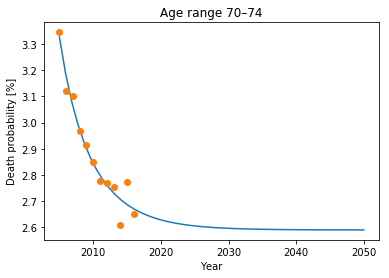

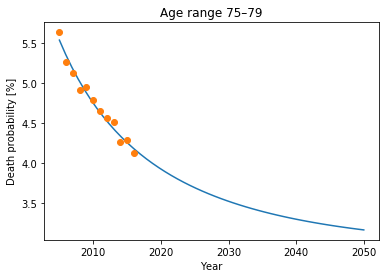

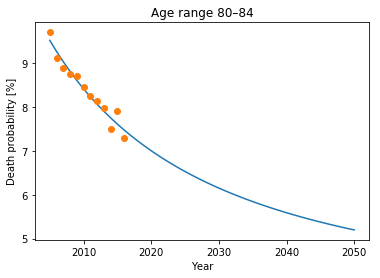

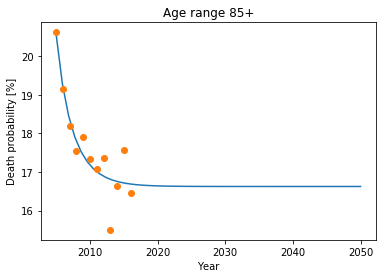

In [2]:
def model_down(val, x):
    return np.absolute(val[0] / (x**val[1] + val[2]))

def model_up(val, x):
    return np.absolute(val[0] + val[1] * x**val[2])

def func_down(val, x, y):
    return model_down(val, x) - y

def func_up(val, x, y):
    return model_up(val, x) - y


x_o = np.array(data['years'][-12:])
x = x_o / x_o.max()

ress = []

for part, name in zip(data['data'], data['names']):
    if name == '0':
        continue
    
    y = np.array(part[-12:])
    y = y / 10**3

    x0 = np.array([1, 1, 1])

    res = least_squares(func_down, x0, args=(x, y))
    ress.append(res)
    xnew = np.linspace(x.min(), 2050/x_o.max(), 50)

    #celkovo *= model(res.x, 2016/x_o.max())
    #amp.append(model(res.x, 2017/x_o.max()))
    #print(model(res.x, 2050/x_o.max()), '%')
    plt.xlabel('Year')
    plt.ylabel('Death probability [%]')
    plt.title('Age range ' + name)
    plt.plot(xnew*x_o.max(), model_down(res.x, xnew), '-', x *x_o.max(), y , 'o')
    #plt.ylim(0,0.1)
    plt.show()

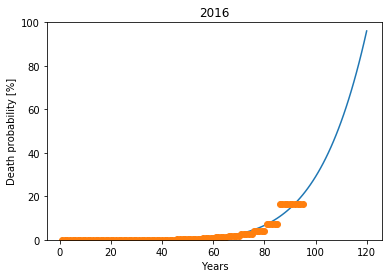

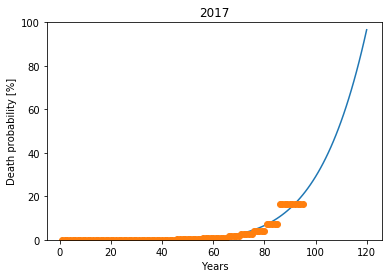

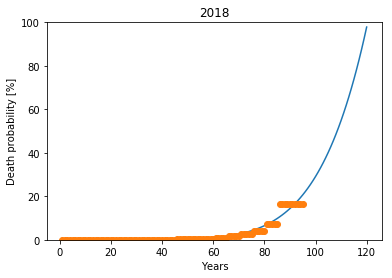

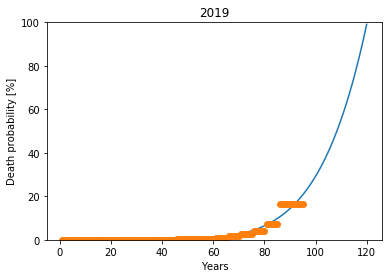

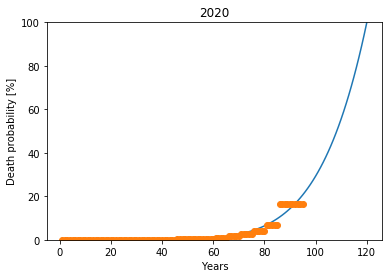

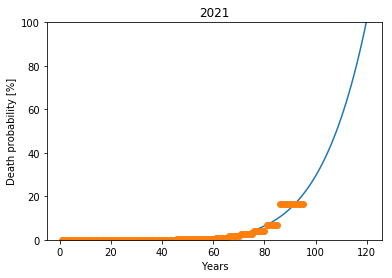

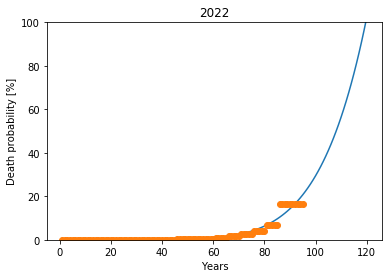

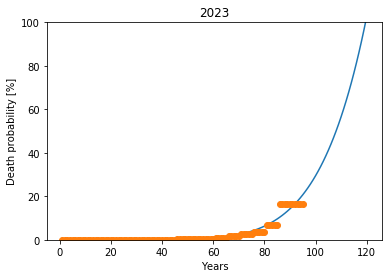

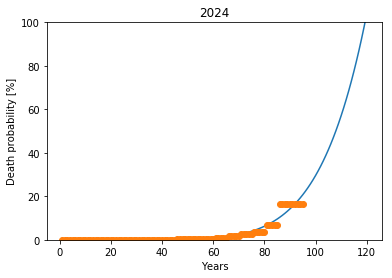

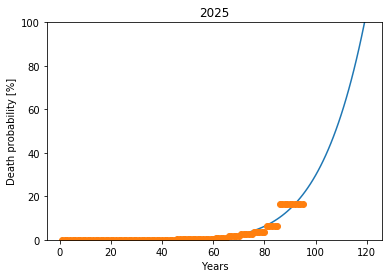

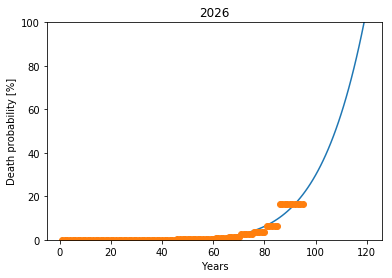

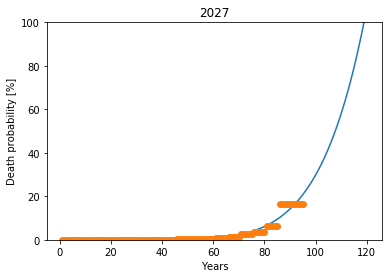

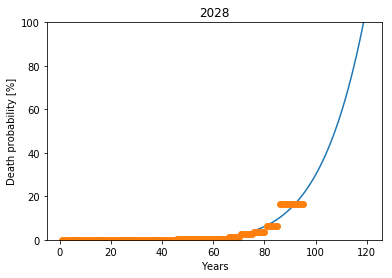

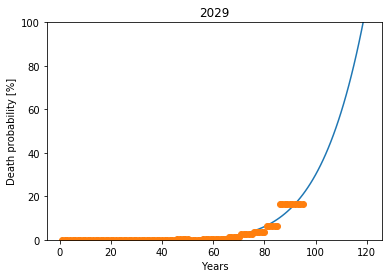

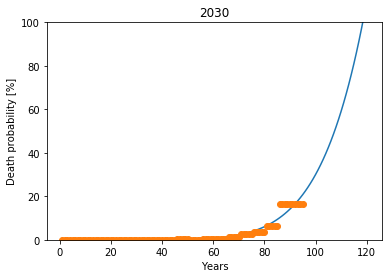

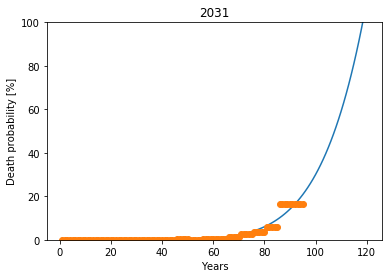

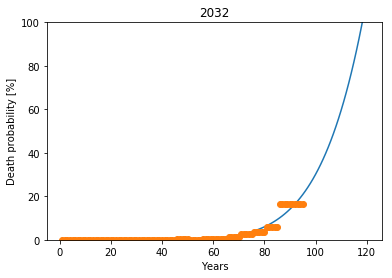

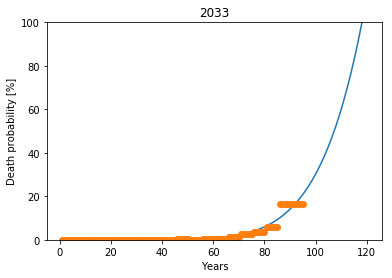

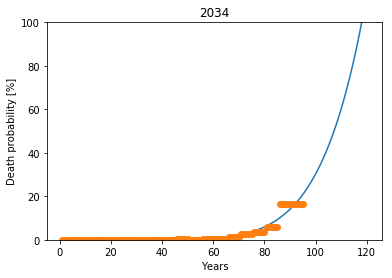

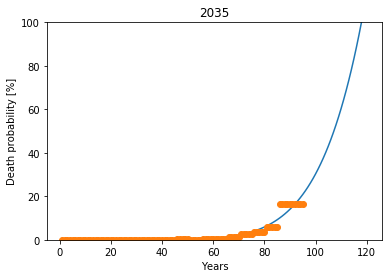

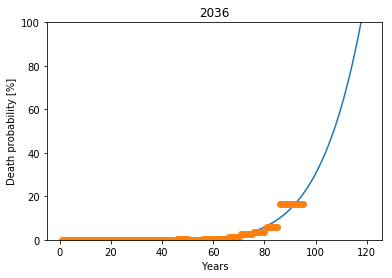

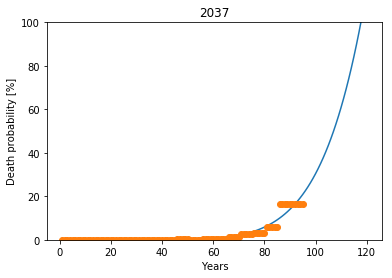

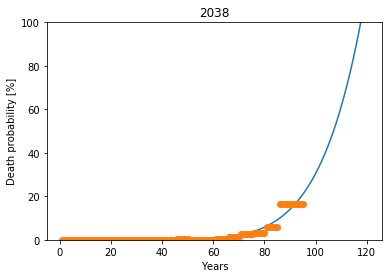

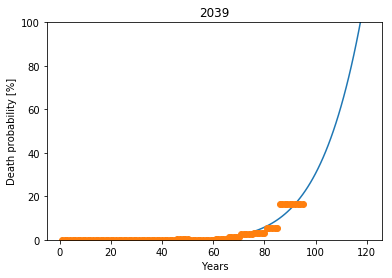

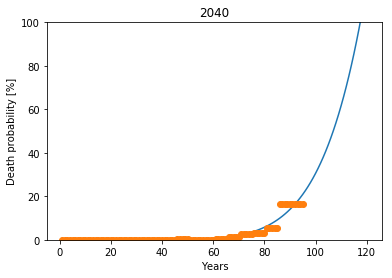

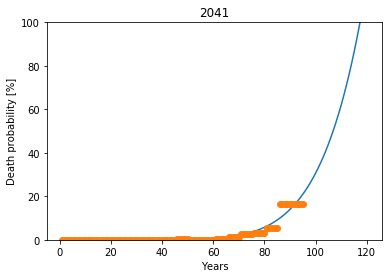

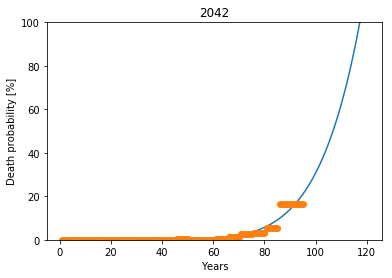

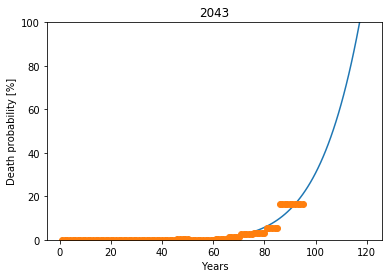

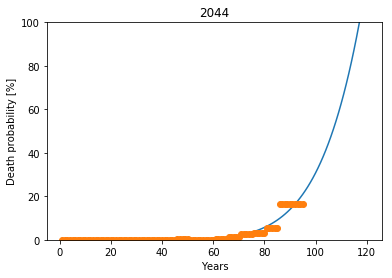

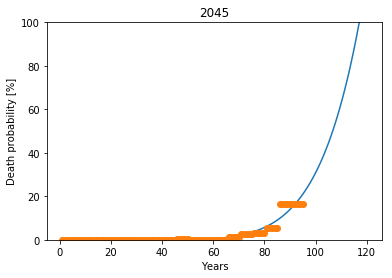

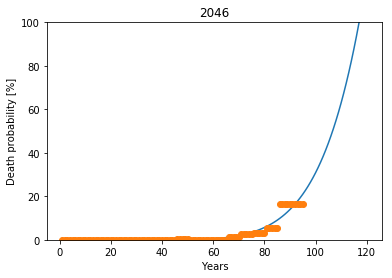

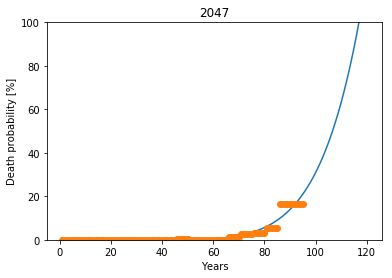

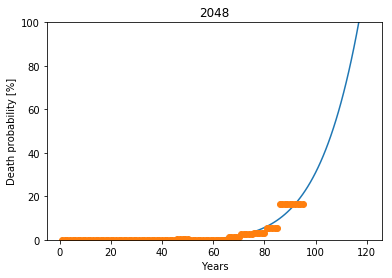

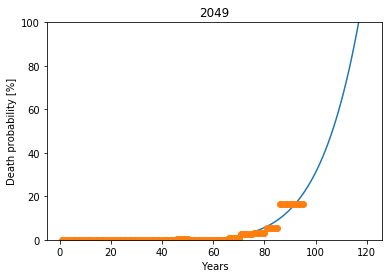

In [3]:
for year in range(2016, 2050):
    values = []
    for res in ress:
        val = model_down(res.x, year/2016)
        values += [val] * 5
    values += [values[-1]] * 5
    
    y = np.array(values)
    x = np.array(range(1, len(values) + 1))

    x0 = np.array([1, 1, 1])
    res = least_squares(func_up, x0,args=(x, y))
    
    xnew = np.linspace(1, 120, 120)
    plt.title(year)
    plt.xlabel('Years')
    plt.ylabel('Death probability [%]')
    plt.plot(xnew, model_up(res.x, xnew), '-', x , y , 'o')
    plt.ylim(0,100)
    plt.show()

In [4]:
from controler import Controler

In [5]:
contr = Controler('new_data.json', 2050)

In [6]:
d_2013 = [[], [], [], [], []]
while contr.clr[0].year != 2051:
    tmp = [0, 0 ,0]
    for i in contr.clr[65:75]:
        tmp[0] += i.alive() * 0.004098665455
    for i in contr.clr[75:85]:
        tmp[1] += i.alive() * 0.0215487758
    for i in contr.clr[85:]:
        tmp[2] += i.alive() * 0.0758
    
    d_2013[1].append(tmp[0])
    d_2013[2].append(tmp[1])
    d_2013[3].append(tmp[2])
    d_2013[4].append(sum(tmp))
    d_2013[0].append(i.year)
    contr.resolve_year()

#tmp = np.array(d_2013)
#tmp[1] * 0.004098665455

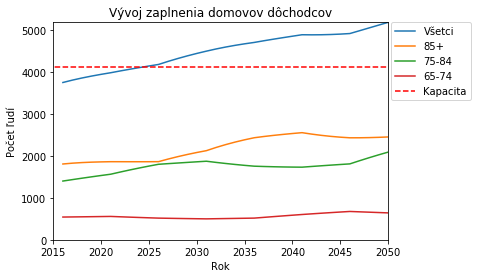

In [8]:
plt.plot(d_2013[0], d_2013[4], label='Všetci')
plt.plot(d_2013[0], d_2013[3], label='85+')
plt.plot(d_2013[0], d_2013[2], label='75-84')
plt.plot(d_2013[0], d_2013[1], label='65-74')
plt.plot(d_2013[0][0], d_2013[4][0])
plt.plot([0, 2050], [4128, 4128], 'r--', label='Kapacita')
plt.ylim(0, max(d_2013[4]))
plt.xlim(2015, 2050)
plt.title('Vývoj zaplnenia domovov dôchodcov')
plt.xlabel('Rok')
plt.ylabel('Počet ľudí')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()